![League of Legends](./assets/lol_logo3.png)

# Supervised Classification of Diamond LoL Ranked Game Wins based on Early-Game (10 Minutes) Features

This project investigates the factors that influence victory in high Diamond-ranked League of Legends games using a supervised classification machine learning algorithm, specifically, the **Random Forest Algorithm**. The data involved in this project specifically focuses on the first 10 minutes of gameplay, often considered a crucial phase for establishing an early lead.

In [1]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing  import StandardScaler, MinMaxScaler
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn

df = pd.read_csv('./data/high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


______________________________________________________________________________________________________________________________

# Modeling the Problem to be Solved

To goal of this project is to **predict if a team will win based on certain game state features**. By selecting the correct features that provide a certain level of contribution to the game state, we can train and develop a model that is able to determine a team's likeliness to win a game.

The reasoning behind each feature used is further explained in the "Feature Engineering" section below.

![League of Legends](./assets/lol_victory1.jpg)

______________________________________________________________________________________________________________________________

# Exploratory Data Analysis (EDA)

###  Structural Analysis of the Dataset

The dataset on hand consists of numerous League of Legends matches and their corresponding set of gameplay information that explains how the game state progressed in the first 10 minutes. To be more specific, this dataset focused only on Diamond Ranked games wherein Diamond is considered to be a high rank division consisting of skilled players.

Furthermore, the current dataset consists a total of **45 columns** (consisting the different raw attributes of each data point) and **9879 rows** (consisting the total number of data points in the dataset).

In [2]:
df.shape

(9879, 40)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

### Checking for Null Values

The provided dataset is observed to hold no null values in all possible data points. Therefore, no further data corrections will be performed.

In [4]:
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

### Analyzing the Dataset Statistics
To progress in the EDA, we need to analyze the different statistical values that correspond to the given dataset. In this case, here are the key points needed to be analyzed:

* **Standard Deviation** - It is noticeable that in the majority of existing raw features, there is a wide spread in the values of the datapoints. This can possibly skew the modeling of the data in the later stages of this project. Specifically, some of these raw features include: {'blueWardsPlaced', 'blueGoldDiff', 'redGoldDiff', 'redExperienceDiff'}
<br><br>
* **Absence of Intended Features** - Although the DataFrame below provides the comprehensive statistics of each raw feature, it does not accurately represent the possibilities of the model's results because we still need to undergo Feature Engineering.

In [5]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


______________________________________________________________________________________________________________________________

# Feature Engineering

### Feature Creation

The idea behind building the features of the dataset focuses on the difference between the parallel attributes of the Blue Team and Red Team. In this case, given that we have two opposing sides, I decided to focus on the data belonging to one particular side, **the Blue team**. This is because some data is simply just the opposite of the other, and for other instances, you just need to get the difference between the data of each side.


For this problem, the 'blueWins' attribute will serve as the 'target variable' which contains the accurate categorization results of each match instance.

* **Blue Wins** - This boolean variable displays whether the blue team won the game overall.

______________________________________________________________________________________________________________________________

Furthermore, we only chose features that might contribute to the overall totality of the game state which is explained further below:

* **Blue Gold Difference** - Gold is one of the primary resources in League of Legends (LoL). By obtaining gold through various means, players are able to buy items which provides their character with greater strength. Greater team gold means that your team will generally have more items, and items are useful in winning you the match.
<br><br>
* **Blue Experience Difference** - Along with gold, experience is another primary resource in LoL. Experience allows players to level up over the game, and these level ups are important because they give more stats, skills, and skill damage over the course of the game.
<br><br>
* **Blue Wards Placed Difference** - Securing vision is a very important concept in LoL because it allows teams to have access to information. By having information about where the enemy team is, your team is able to make decisions such as deciding to play aggressive (because the enemy jungler is far from your lane), play safe (because enemy team is near you), contest important objectives, etc.
<br><br>
* **Blue Elite Monsters Defeated Difference** - Elite monsters constistute as important game objectives because defeating them gives a team a sizeable advantage which will help them win the game. The following are the main elite monsters in the game that contribute to a team's game state:
<br><br>  
        
    * Dragon - There are varying team buffs that dragons give when you defeat them such as additional damage, movement speed, health regeneration, and resistances.
        
    * Rift Herald - Defeating the rift herald gives a team a summonable monster that can charge onto enemy turrets and deal massive damage onto them. Although it doesn't give a direct effect to the players, it aids in destroying towers which also translates to gold (resources) that will help the team to win.
<br><br>    
* **Blue Kills Difference** - The main benefit of defeating champions, especially in the early game, is to gain gold. Specifically, defeating an enemy champion rewards the player with +300 gold. In the case of the team that first defeats an enemy champion, that player will receive a bonus +100 gold for getting "first blood", therefore a total of +400 gold.
<br><br>
* **Blue First Blood** - This feature is a boolean that represents whether the blue team got the first blood or not. If the value is '1', then blue side got the first blood, otherwise if it is '0', red side got the first blood instead. Again, getting the first blood adds an additional of +100 gold to the player who defeated another player first, therefore it definitely serves a great purpose especially in the early game.
<br><br>
* **Blue Towers Destroyed Difference** - Destroying towers also contributes to the game state by rewarding the player with gold. There are many different towers in LoL that reward different gold amounts, however, given that this is only the first 10 minutes, we are majorly discussing Tier 1 towers only. Furthermore, **the team destroying the first tower** is given a huge advantage since the player who destroyed the first tower in the map will be rewarded with +350 gold. Other subsequent instances where towers are destroyed count as +200 gold for the player who hits it last, and +75 gold for teammates around nearby teammates.

In [6]:
df['blueWardsDiff'] = df['blueWardsPlaced'] - df['redWardsPlaced']
df['blueEliteMonstersDiff'] = df['blueEliteMonsters'] - df['redEliteMonsters']
df['blueKillsDiff'] = df['blueKills'] - df['redKills']
df['blueTowersDestroyedDiff'] = df['blueTowersDestroyed'] - df['redTowersDestroyed']

### Feature Selection

In [7]:
clean_df = df[['blueWins', 'blueWardsDiff', 'blueGoldDiff', 'blueExperienceDiff',
               'blueEliteMonstersDiff', 'blueKillsDiff', 'blueFirstBlood',
               'blueTowersDestroyedDiff']]

X = clean_df.drop(columns=['blueWins'])

y = clean_df['blueWins']

In [8]:
clean_df.head()

,blueWins,blueWardsDiff,blueGoldDiff,blueExperienceDiff,blueEliteMonstersDiff,blueKillsDiff,blueFirstBlood,blueTowersDestroyedDiff
0,0,13,643,-8,0,3,1,0
1,0,0,-2908,-1173,-2,0,0,-1
2,0,0,-1172,-1033,1,-4,0,0
3,0,28,-1321,-7,1,-1,0,0
4,0,58,-1004,230,-1,0,0,0


### Scaling the Data

In the case of the data contained in this dataset, there are a lot of variables that have **varying value ranges**. For example, gold differential can reach up to thousands, while ward differential usually only falls under tens (2 digits).

In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

______________________________________________________________________________________________________________________________

<br><br><center><font size = 6.5><b>Random Forest Classifier</b></font></center>

## Splitting the Dataset into Training and Testing Set

In [10]:
# Standard training/testing split: 80% training data - 20% testing data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Building the Random Forest Model (Gini and Entropy criterion)

In [11]:
rf_gini = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42)
rf_entropy = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=42)

rf_gini.fit(X_train, y_train)
rf_entropy.fit(X_train, y_train)

y_pred_gini = rf_gini.predict(X_test)
y_pred_entropy = rf_entropy.predict(X_test)

## Accuracy Scores

In [12]:
accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print("Accuracy (Gini Criterion):", accuracy_gini)
print("Accuracy (Entropy Criterion):", accuracy_entropy)

Accuracy (Gini Criterion): 0.7191295546558705
Accuracy (Entropy Criterion): 0.7064777327935222


From the accuracy values above based on different model evaluation criteria, the **Gini Criterion** obtained a HIGHER ACCURACY value of 0.7191 compared to the Entropy Criterion.

## Classification Report (Gini)

In [13]:
class_report_gini = classification_report(y_test, y_pred_gini)
print("Classification Report (Gini Criterion):\n", class_report_gini)

Classification Report (Gini Criterion):
               precision    recall  f1-score   support

           0       0.71      0.73      0.72       983
           1       0.73      0.71      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



## Classification Report (Entropy)

In [14]:
class_report_entropy = classification_report(y_test, y_pred_entropy)
print("Classification Report (Entropy Criterion):\n", class_report_entropy)

Classification Report (Entropy Criterion):
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       983
           1       0.72      0.69      0.70       993

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976



<br><br>
With the different model evaluation criterion, let us focus more on the interpretation of one of these criterion: **Gini Criterion**. In most cases, the difference in performance between Gini and entropy is minimal. However, Gini is often preferred due to its computational efficiency, especially for large datasets.
<br><br>
* **Precision**: Precision represents the proportion of positive predictions (class predicted as 1) that were actually correct. In this case, both classes have a precision of around 0.71-0.73, indicating that roughly 71-73% of the times the model predicted class 1, it was correct.
<br><br>
* **Recall**: Recall represents the proportion of actual positive cases (class actually belonging to 1) that were correctly identified by the model. Here, both classes have a recall of around 0.70-0.73, meaning the model captured approximately 70-73% of the actual class 1 instances.
<br><br>
* **F1-Score**: The F1-Score is the harmonic mean of precision and recall, providing a balanced view of both metrics. Scores close to 1 indicate good performance. Both classes have F1-scores of around 0.72, suggesting a reasonable balance between precision and recall.
<br><br>
* **Support**: Support represents the total number of data points belonging to each class. In this case, both classes have roughly the same number of instances (around 983 and 993).
<br><br>
In conclusion, the classification report suggests that the Random Forest model achieves a fair level of performance on the League of Legends classification task. The model exhibits balanced precision, recall, and F1-score values for both classes, indicating its ability to classify instances into the two categories with moderate accuracy (around 72%). This balanced performance is likely due to the inherent strength of Random Forests in handling potential class imbalances in datasets. Compared to simpler models like decision trees, which might struggle with uneven class distribution, the Random Forest model demonstrates a more robust classification ability for both classes in your League of Legends data.

## Confusion Matrix

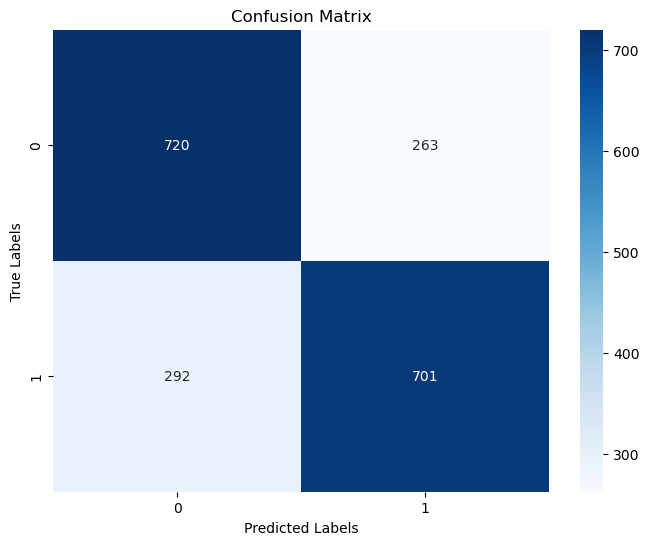

In [15]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gini)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**True Negative (TN)**: The model correctly predicted 720 instances of matches as game defeats.
<br>
**False Positive (FP)**: The model incorrectly predicted 263 instances of matches as game wins.
<br>
**False Negative (FN)**: The model incorrectly predicted 292 instances of matches as game losses.
<br>
**True Positive (TP)**: The model correctly predicted 701 instances of matches as game wins.
<br><br>
The confusion matrix data reveals strengths and weaknesses in the model's ability to predict game wins and losses. The model exhibits moderate precision (73%), correctly identifying most of the wins it predicts. However, it misses a significant portion of actual winning matches (292 false negatives), resulting in a recall of only 71%. This suggests the model struggles to capture a substantial number of true wins. Analyzing these misclassifications, particularly false positives (predicted wins that were actually losses) and false negatives, can be highly informative. The model might be prioritizing features that aren't strong indicators of victory, leading to false positives. Additionally, it might lack crucial features or require more training on winning examples to improve its ability to identify true wins. By investigating these errors and exploring feature engineering, hyperparameter tuning, or even trying different algorithms, the model's performance in distinguishing between wins and losses can potentially be improved. The relative importance of correctly classifying wins and losses depends on the specific context of the application.

______________________________________________________________________________________________________________________________

# Conclusion / Data Evaluation

Although the accuracy of the model under the Gini Criterion is only slightly greater 70%, it is **MUCH CONCLUSIVE** to formulate the reasoning behind what leads to team wins in the first 10 minutes of the game. According to the model's classification report, it is able to classify blue team losses by an accuracy of **71%**, while blue team wins were correctly classified through a **73%** accuracy. The rightful conclusions to these results would be:
<br><br><br>
1. **Highlights the Importance of Early Game** - The data suggests that around 70% of the time, a team will eventually win the game because of the advantages that they acquired in the first 10 minutes. Therefore, fighting for early objectives instead of "scaling" (waiting for late game) might be more preferable.
<br><br><br>
2. **Early Game Advantage Does Not Ensure Victory** - The data suggests that early resource advantage does not ALWAYS translate to victory. Around 30% of these games in where they did win early, but they still lost because of other factors. Given enough game knowledge, here are some possible factors onto why these games were incorrectly predicted:

   a.) **Late Game Scaling Team Compositions** - It is plausible that the game was able to last longer than the average game time (more than 40 minutes) which leads to the activation/power-up of certain team compositions. In LoL, there are champions that are strong early but becomes weaker as the game goes on. In contrast, a champion can also be weak early but strong in the later stages of the game.
   
   b.) **Insufficient Data on Team Compositions** - In the given dataset, only factors such as gold differential, kills, and ward scores are taken into account. In this case, other factors such as team compositions and champion winrates are NOT taken into account which makes the acquired data to be not fully accurate. Nonetheless, the features indicated in this project still give a valid, conclusive result for the problem on hand.
   
   c.) **Misplays in Mid Game and Late Game** - Given that the data only considers the first 10 minutes, these inaccuracies might have came from certain cases in where the early winning team performed several misplays that caused the tides to turn against them.
<br><br><br>
3. **Lack of Enough Features** - As mentioned in the previous conclusion, there are other factors that may have influenced onto why 30% of the games were incorrectly classified/predicted. Therefore, in order to create a better model for this problem, we need to create a more **comprehensive dataset** that will include features such as the champions used, team compositions, etc.

![League of Legends](./assets/lol_early_game.webp)

## Visualizing the Random Forest

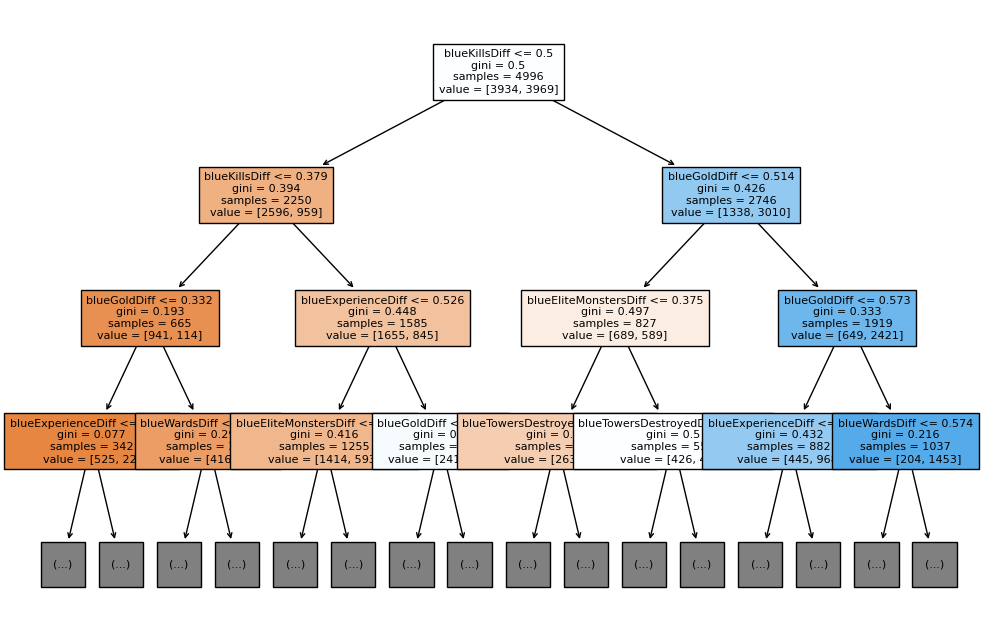

In [16]:
# Visualize the first decision tree in the Random Forest
plt.figure(figsize=(12,8))
tree.plot_tree(rf_gini.estimators_[0], feature_names = X.columns, filled=True, max_depth = 3, fontsize=8)
plt.show()